#Libraries, Dates and Data

In [ ]:
#installing libraries
!pip install yfinance
!pip install tfcausalimpact

In [2]:
#Import Libraries
import yfinance as yf 
import pandas as pd
from causalimpact import CausalImpact 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Define the Dates
training_start = "2014-01-01"
training_end = "2015-08-26"
treatment_start = "2015-09-02"
treatment_end = "2015-09-30"
end_stock = "2015-10-01"

In [5]:
#Dowload Volkswagen stock
y = ["VOW.DE"]
y = yf.download(y,
                start = training_start,
                end = end_stock,
                interval = "1wk")
y = y['Adj Close'].rename("y")
y 

[*********************100%***********************]  1 of 1 completed


Date
2014-01-01    164.446136
2014-01-08    161.642334
2014-01-15    167.164948
2014-01-22    159.220886
2014-01-29    149.110275
                 ...    
2015-09-02    146.728638
2015-09-09    148.014969
2015-09-16     98.647087
2015-09-23     91.638878
2015-09-30     93.191338
Name: y, Length: 92, dtype: float64

In [9]:
#Load more data
stocks = ["FB", "DIS", "NVS", "CARL-B.CO"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1wk")
X = X.iloc[:, :len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%***********************]  4 of 4 completed


,CARL-B.CO,DIS,FB,NVS
Date,,,,
2014-01-01,511.266571,70.256935,57.919998,53.936932
2014-01-08,492.046021,68.517540,57.740002,54.798878
2014-01-15,510.839447,68.287460,58.509998,55.226467
2014-01-22,474.961090,67.072647,55.139999,53.998001
2014-01-29,463.001648,65.388466,62.750000,53.074966


In [12]:
#Combine both data sets
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,y,CARL-B.CO,DIS,FB,NVS
Date,,,,,
2014-01-01,164.446136,511.266571,70.256935,57.919998,53.936932
2014-01-08,161.642334,492.046021,68.517540,57.740002,54.798878
2014-01-15,167.164948,510.839447,68.287460,58.509998,55.226467
2014-01-22,159.220886,474.961090,67.072647,55.139999,53.998001
2014-01-29,149.110275,463.001648,65.388466,62.750000,53.074966


#Correlation matrix

In [13]:
#subsetting just the training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,DIS,FB,NVS
Date,,,,,
2015-07-29,165.003220,524.887390,114.076340,94.059998,74.717911
2015-08-05,165.180634,523.124512,101.242882,93.620003,73.657410
2015-08-12,155.422379,520.039490,100.249207,95.169998,74.465408
2015-08-19,148.857742,437.890900,89.890556,83.000000,68.636292
2015-08-26,143.668091,435.951782,93.284065,87.230003,68.304443


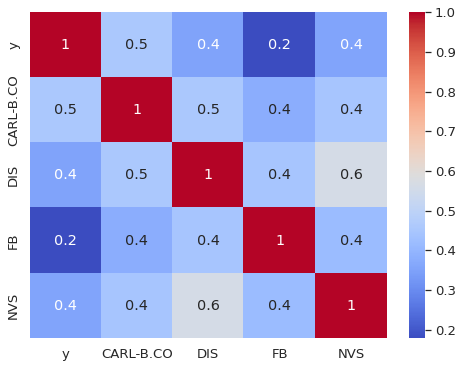

In [15]:
#Correlation matrix
plt.figure(figsize = (8,6))
sns.set(font_scale=1.2)
sns.heatmap(data = df_training.pct_change().dropna().corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'coolwarm')

In [16]:
#removing unwanted time series
df = df.drop(columns = ["FB"])
df.head(1)

,y,CARL-B.CO,DIS,NVS
Date,,,,
2014-01-01,164.446136,511.266571,70.256935,53.936932


#Google Causal Impact

In [17]:
#Define pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [ ]:
#Causal Impact
impact = CausalImpact(data = df,
                      pre_period = pre_period,
                      post_period = post_period)

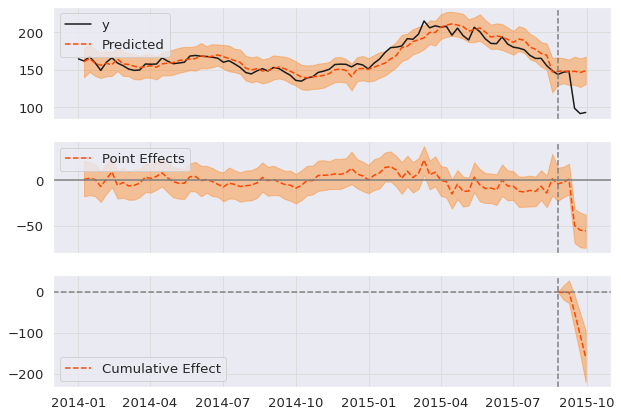

In [19]:
#vizualization
impact.plot()

In [20]:
#summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    115.64             578.22
Prediction (s.d.)         147.73 (6.54)      738.67 (32.69)
95% CI                    [134.47, 160.1]    [672.37, 800.51]

Absolute effect (s.d.)    -32.09 (6.54)      -160.45 (32.69)
95% CI                    [-44.46, -18.83]   [-222.29, -94.15]

Relative effect (s.d.)    -21.72% (4.43%)    -21.72% (4.43%)
95% CI                    [-30.09%, -12.75%] [-30.09%, -12.75%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
